In [114]:
import os

from datetime import datetime
import tqdm
import math, random

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, random_split
from torchvision import datasets, transforms
from torchvision.utils import make_grid
from PIL import Image


import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

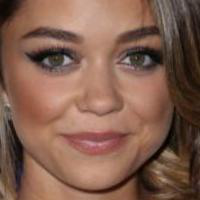

3


In [161]:
to_tensor = transforms.ToTensor()
resize = transforms.Resize([200, 200])
flip = transforms.RandomHorizontalFlip(p=1)

sample = Image.open('face_age/024/3949.png')
sample = resize(sample)
#sample = flip(sample)
sample_tensor = to_tensor(sample).unsqueeze(0)

display(sample)
print(sample_tensor.shape[1])

## Generating dataset with proper format

In [130]:
features_set = []
label_set = []
to_tensor = transforms.ToTensor()
resize = transforms.Resize([200, 200])

folder_count = []

for folder in os.listdir('face_age/'):
    count = 0
    if folder == '.DS_Store':
        continue
    for img in os.listdir(f'face_age/{folder}'):
        if img == '.DS_Store':
            continue
        count += 1
        sample = Image.open(f'face_age/{folder}/{img}')
        sample = resize(sample)
        sample_tensor = to_tensor(sample)
        label_set.append(int(folder))
        features_set.append(sample_tensor)

    folder_count.append([int(folder),count])

In [131]:
sorted(folder_count)

[[1, 1095],
 [2, 465],
 [3, 272],
 [4, 257],
 [5, 176],
 [6, 112],
 [7, 125],
 [8, 236],
 [9, 159],
 [10, 139],
 [11, 60],
 [12, 105],
 [13, 75],
 [14, 135],
 [15, 143],
 [16, 209],
 [17, 102],
 [18, 181],
 [19, 58],
 [20, 103],
 [21, 136],
 [22, 139],
 [23, 92],
 [24, 191],
 [25, 156],
 [26, 279],
 [27, 126],
 [28, 145],
 [29, 150],
 [30, 109],
 [31, 97],
 [32, 141],
 [33, 46],
 [34, 87],
 [35, 121],
 [36, 112],
 [37, 94],
 [38, 91],
 [39, 136],
 [40, 85],
 [41, 56],
 [42, 84],
 [43, 52],
 [44, 27],
 [45, 77],
 [46, 61],
 [47, 70],
 [48, 64],
 [49, 99],
 [50, 105],
 [51, 62],
 [52, 133],
 [53, 133],
 [54, 106],
 [55, 52],
 [56, 132],
 [57, 60],
 [58, 96],
 [59, 59],
 [60, 137],
 [61, 50],
 [62, 76],
 [63, 47],
 [64, 31],
 [65, 112],
 [66, 54],
 [67, 46],
 [68, 57],
 [69, 45],
 [70, 52],
 [71, 25],
 [72, 70],
 [73, 31],
 [74, 16],
 [75, 87],
 [76, 34],
 [77, 19],
 [78, 30],
 [79, 16],
 [80, 70],
 [81, 10],
 [82, 29],
 [83, 7],
 [84, 11],
 [85, 130],
 [86, 22],
 [87, 4],
 [88, 17],
 [89

In [132]:
buckets = [10,20,30,40,50,60,70,80,90,100,110]
bucket_count_list = []
for bucket in buckets:
    bucket_count = 0
    for age, count in folder_count:
        if age <= bucket and age > (bucket - 10):
            bucket_count += count
    bucket_count_list.append(bucket_count)

In [133]:
bucket_count_list

[3036, 1171, 1523, 1010, 695, 970, 570, 398, 301, 40, 3]

In [164]:
# This time with under sampling with cap = 100
# Also double images for counts not exceeding 100 in folder

features_set = []
label_set = []
to_tensor = transforms.ToTensor()
resize = transforms.Resize([200, 200])
flip = transforms.RandomHorizontalFlip(p=1)

folder_count = []

for folder in os.listdir('face_age/'):
    count = 0
    if folder == '.DS_Store':
        continue
        
    for img in os.listdir(f'face_age/{folder}'):
        if img == '.DS_Store':
            continue
        count += 1
        sample = Image.open(f'face_age/{folder}/{img}')
        sample = resize(sample)
        sample_tensor = to_tensor(sample)
        label_set.append(int(folder))
        features_set.append(sample_tensor)

        if sample_tensor.shape[0] > 3:
            print(f'face_age/{folder}/{img}')
        
        if count >= 100:
            break    

    if count < 100:
        for img in os.listdir(f'face_age/{folder}'):
            if img == '.DS_Store':
                continue
            count += 1
            sample = Image.open(f'face_age/{folder}/{img}')
            sample = resize(sample)
            sample = flip(sample)
            sample_tensor = to_tensor(sample)
            label_set.append(int(folder))
            features_set.append(sample_tensor)

            if count >= 100:
                break    

    folder_count.append([int(folder),count])

In [165]:
sorted(folder_count)

[[1, 100],
 [2, 100],
 [3, 100],
 [4, 100],
 [5, 100],
 [6, 100],
 [7, 100],
 [8, 100],
 [9, 100],
 [10, 100],
 [11, 100],
 [12, 100],
 [13, 100],
 [14, 100],
 [15, 100],
 [16, 100],
 [17, 100],
 [18, 100],
 [19, 100],
 [20, 100],
 [21, 100],
 [22, 100],
 [23, 100],
 [24, 100],
 [25, 100],
 [26, 100],
 [27, 100],
 [28, 100],
 [29, 100],
 [30, 100],
 [31, 100],
 [32, 100],
 [33, 92],
 [34, 100],
 [35, 100],
 [36, 100],
 [37, 100],
 [38, 100],
 [39, 100],
 [40, 100],
 [41, 100],
 [42, 100],
 [43, 100],
 [44, 54],
 [45, 100],
 [46, 100],
 [47, 100],
 [48, 100],
 [49, 100],
 [50, 100],
 [51, 100],
 [52, 100],
 [53, 100],
 [54, 100],
 [55, 100],
 [56, 100],
 [57, 100],
 [58, 100],
 [59, 100],
 [60, 100],
 [61, 100],
 [62, 100],
 [63, 94],
 [64, 58],
 [65, 100],
 [66, 100],
 [67, 92],
 [68, 100],
 [69, 90],
 [70, 100],
 [71, 44],
 [72, 100],
 [73, 62],
 [74, 32],
 [75, 100],
 [76, 68],
 [77, 38],
 [78, 60],
 [79, 32],
 [80, 100],
 [81, 20],
 [82, 58],
 [83, 14],
 [84, 22],
 [85, 100],
 [86, 

In [166]:
buckets = [10,20,30,40,50,60,70,80,90,100,110]
bucket_count_list = []
for bucket in buckets:
    bucket_count = 0
    for age, count in folder_count:
        if age <= bucket and age > (bucket - 10):
            bucket_count += count
    bucket_count_list.append(bucket_count)
    
bucket_count_list

[1000, 1000, 1000, 992, 954, 1000, 934, 636, 432, 80, 6]

In [167]:
features_set = torch.stack(features_set)

In [168]:
label_set

[24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,


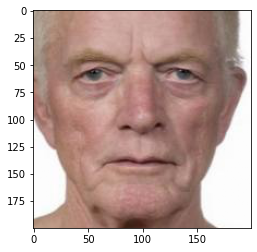

In [175]:
plt.imshow(features_set[5000].permute(1, 2, 0))

In [176]:
label_set = torch.as_tensor(label_set,dtype=torch.float)
label_set[5000]

tensor(75.)

In [177]:
train_size = math.floor(0.7*len(features_set))

In [178]:
features_set[0:2]

tensor([[[[0.1216, 0.1137, 0.1059,  ..., 0.2902, 0.2863, 0.2863],
          [0.1137, 0.1059, 0.0980,  ..., 0.2706, 0.2706, 0.2745],
          [0.0980, 0.0941, 0.0863,  ..., 0.2510, 0.2471, 0.2510],
          ...,
          [0.3686, 0.3333, 0.3490,  ..., 0.1882, 0.2157, 0.2353],
          [0.4000, 0.3843, 0.3961,  ..., 0.1961, 0.2118, 0.2196],
          [0.4353, 0.4353, 0.4431,  ..., 0.2118, 0.2157, 0.2157]],

         [[0.0784, 0.0784, 0.0706,  ..., 0.2471, 0.2431, 0.2431],
          [0.0706, 0.0706, 0.0627,  ..., 0.2275, 0.2275, 0.2314],
          [0.0549, 0.0588, 0.0510,  ..., 0.2078, 0.2039, 0.2078],
          ...,
          [0.2784, 0.2431, 0.2588,  ..., 0.1137, 0.1412, 0.1608],
          [0.3098, 0.2941, 0.3059,  ..., 0.1216, 0.1373, 0.1451],
          [0.3451, 0.3451, 0.3529,  ..., 0.1373, 0.1412, 0.1412]],

         [[0.0627, 0.0588, 0.0510,  ..., 0.2314, 0.2275, 0.2275],
          [0.0549, 0.0510, 0.0431,  ..., 0.2118, 0.2118, 0.2157],
          [0.0392, 0.0392, 0.0314,  ..., 0

In [182]:
dataset = TensorDataset(features_set, label_set)
train_data,test_data = random_split(dataset,[train_size,len(dataset)-train_size])

train_loader = DataLoader(train_data,batch_size=201,drop_last=True)
test_loader = DataLoader(test_data,batch_size=201,drop_last=True)

count = 0
for images, labels in test_loader:
    print(images.size(), labels.size())
    count+=1
    if count > 5:
        break

torch.Size([201, 3, 200, 200]) torch.Size([201])
torch.Size([201, 3, 200, 200]) torch.Size([201])
torch.Size([201, 3, 200, 200]) torch.Size([201])
torch.Size([201, 3, 200, 200]) torch.Size([201])
torch.Size([201, 3, 200, 200]) torch.Size([201])
torch.Size([201, 3, 200, 200]) torch.Size([201])


In [183]:
len(train_loader)

27

## Model

In [188]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,6,3,1,padding=1)
        self.conv2 = nn.Conv2d(6,16,3,1,padding=1)
        self.fc1 = nn.Linear(50*50*16,6000)
        self.fc2 = nn.Linear(6000,120)
        self.fc3 = nn.Linear(120, 84)
        self.fc4 = nn.Linear(84,6)
        self.fc5 = nn.Linear(6,1)
        
    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X,2,2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X,2,2)
        X = X.reshape(-1, 50*50*16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = F.relu(self.fc3(X))
        X = F.relu(self.fc4(X))
        X = self.fc5(X)
        
        return X.squeeze()

In [189]:
model = Model()
model

Model(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=40000, out_features=6000, bias=True)
  (fc2): Linear(in_features=6000, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=84, bias=True)
  (fc4): Linear(in_features=84, out_features=6, bias=True)
  (fc5): Linear(in_features=6, out_features=1, bias=True)
)

In [192]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

In [191]:
epochs = 20

train_losses = []
test_losses = []


start_time = datetime.now()
for i in range(1,epochs+1):
    print(f'Epoch {i}:')
    for b, (train_data,train_label) in enumerate(train_loader):
        b += 1
        y_pred = model(train_data)
        loss = criterion(y_pred,train_label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if b % 9 == 0:
            print(f"Epoch: {i} Batch: {b} Loss: {loss.item()} ")
            
    train_losses.append(loss.detach().numpy())
    
    with torch.no_grad():
        for b, (test_data, test_label) in enumerate(test_loader):
            b += 1
            y_pred = model(test_data)
            loss = criterion(y_pred,test_label)
            
        test_losses.append(loss.detach().numpy())
        
end_time = datetime.now()
print(f"Time taken for model: {str(end_time-start_time)}")

Epoch 1:
Epoch: 1 Batch: 9 Loss: 632.2168579101562 
Epoch: 1 Batch: 18 Loss: 540.4611206054688 
Epoch: 1 Batch: 27 Loss: 559.5531616210938 
Epoch 2:
Epoch: 2 Batch: 9 Loss: 406.35394287109375 
Epoch: 2 Batch: 18 Loss: 400.9194641113281 
Epoch: 2 Batch: 27 Loss: 1185.3359375 
Epoch 3:
Epoch: 3 Batch: 9 Loss: 534.533447265625 
Epoch: 3 Batch: 18 Loss: 358.4836120605469 
Epoch: 3 Batch: 27 Loss: 393.0799255371094 
Epoch 4:
Epoch: 4 Batch: 9 Loss: 380.87640380859375 
Epoch: 4 Batch: 18 Loss: 305.5143127441406 
Epoch: 4 Batch: 27 Loss: 371.28369140625 
Epoch 5:
Epoch: 5 Batch: 9 Loss: 348.9798583984375 
Epoch: 5 Batch: 18 Loss: 311.7420654296875 
Epoch: 5 Batch: 27 Loss: 385.52130126953125 
Epoch 6:
Epoch: 6 Batch: 9 Loss: 326.4771728515625 
Epoch: 6 Batch: 18 Loss: 261.4490966796875 
Epoch: 6 Batch: 27 Loss: 320.51251220703125 
Epoch 7:
Epoch: 7 Batch: 9 Loss: 304.38433837890625 
Epoch: 7 Batch: 18 Loss: 266.2152404785156 
Epoch: 7 Batch: 27 Loss: 281.7251892089844 
Epoch 8:
Epoch: 8 Batch

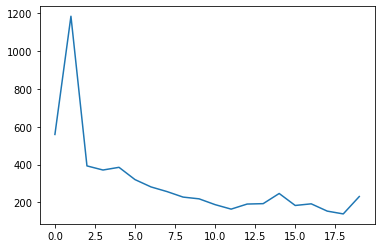

In [193]:
plt.plot(train_losses)

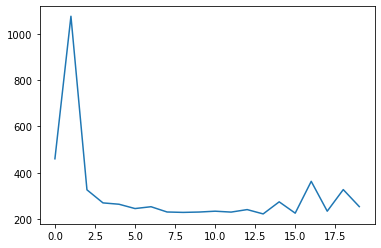

In [194]:
plt.plot(test_losses)

In [195]:
test_losses[-1]

array(253.01413, dtype=float32)

In [209]:
model(features_set[1000])

tensor(14.4491, grad_fn=<SqueezeBackward0>)

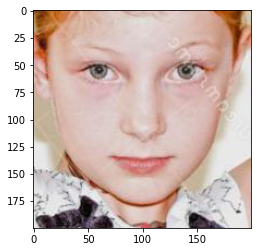

In [210]:
plt.imshow(features_set[1000].permute(1, 2, 0))

In [211]:
label_set[1000]

tensor(13.)

In [109]:
#save model
torch.save(model.state_dict(), 'facial_model.pt')